## Import Data and Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Import labeled dataset

In [3]:
data = pd.read_csv("data/labeled_data.csv")
data.head()

,PDB,No. a.a.,Glycine,S.S.,Long SS,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,...,No. Surf. neg.,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,SDS Stable
0,2H5C,198,32,3.0,2,8,7863.049316,14,13,1202.166504,...,4,246.944275,75,47,1929.952759,9.595960,52.525253,8,213,0
1,5JVI,316,36,0.0,N,-10,12592.415039,21,21,1708.759888,...,26,1090.533569,127,74,3567.560303,48.101266,17.405063,1,3,0
2,2V1F,153,15,0.0,N,0,8144.530273,21,21,1973.160889,...,21,1814.241211,61,49,1495.550049,87.581699,0.000000,1,1,1
3,1B9O,123,6,4.0,4,-8,7029.185059,13,13,1405.147583,...,21,1874.586426,46,36,1701.761353,43.089431,4.878049,6,140,1
4,2PWA,279,33,2.0,2,1,10385.035156,20,20,1764.792358,...,18,901.254578,107,55,2552.219971,32.258065,22.580645,1,3,0


# Import   dataset 2 (labeled esm 2)

In [10]:
dataset2 = pd.read_csv('data/dataset2.csv')
dataset2.head()


,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-0.106052,-0.028277,-0.049900,-0.048172,-0.022454,-0.094518,-0.061531,0.153645,0.061776,-0.111622,...,0.154779,0.000940,-0.012216,-0.037772,0.071069,0.011423,0.039311,-0.051318,-0.138031,-0.068270
1,-0.030346,0.015794,-0.038204,-0.069977,0.002786,-0.097417,-0.018056,0.138168,0.107735,-0.021421,...,-0.009343,-0.137165,0.070771,-0.039607,-0.011787,-0.077273,0.020558,0.014838,-0.122289,-0.059000
2,0.048114,-0.019850,-0.035541,-0.012063,-0.046040,-0.005736,-0.100301,0.032832,0.075569,-0.059691,...,0.086863,-0.108787,0.040456,-0.013540,0.002605,0.025393,0.053454,0.048783,-0.092088,-0.026373
3,-0.070998,0.039915,0.012892,-0.073913,0.015845,-0.079292,-0.015932,0.098513,0.058595,0.006227,...,0.018793,-0.004514,0.010956,0.013707,0.003797,0.046510,0.055690,-0.009589,-0.178329,-0.030247
4,0.007949,0.030922,-0.084674,-0.069309,-0.037835,-0.033629,-0.046397,0.229970,0.048101,-0.107052,...,0.144373,-0.057360,0.091397,-0.017375,0.138946,-0.051818,-0.002533,-0.015262,-0.105503,-0.055646


In [11]:


scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(dataset2)

## Import esm_unlabeled data

In [12]:
dataset2_unlabeled = pd.read_csv('data/esm2_unlabeled.csv')
dataset2_unlabeled.head()

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-0.146392,-0.044388,-0.073572,-0.083538,0.013867,-0.115059,-0.021020,0.251900,0.082191,-0.110854,...,0.104507,-0.209106,0.026390,-0.034675,0.164679,-0.046357,-0.086354,0.092409,-0.050137,-0.178787
1,-0.097094,0.003643,-0.010534,-0.083778,0.009176,-0.063397,-0.049395,0.153481,0.013189,-0.057253,...,0.057338,-0.095117,0.106728,-0.085964,0.067033,0.001800,0.046425,0.032737,-0.098372,-0.114315
2,0.005237,-0.020602,-0.002926,-0.080908,0.027083,0.034999,-0.044002,0.044819,0.000701,-0.027679,...,0.055709,-0.095342,0.042804,-0.025231,0.053732,-0.037928,0.064099,0.038445,-0.057057,-0.022486
3,-0.012934,-0.014526,-0.105428,-0.010334,-0.017943,-0.113075,0.023310,0.148012,0.044867,-0.084258,...,0.115832,-0.082564,0.045533,-0.065703,0.012751,-0.011484,0.043135,0.027399,-0.050511,-0.100954
4,0.027225,-0.053654,-0.052486,-0.090339,0.027644,-0.001249,-0.029163,0.170268,0.087543,-0.038012,...,0.063100,-0.113716,0.046959,-0.027659,0.130872,-0.057488,0.032790,0.111607,-0.140744,-0.089814


In [36]:


scaler = StandardScaler()
scaled_data_unlebeled2 = scaler.fit_transform(dataset2_unlabeled)

In [37]:
## 

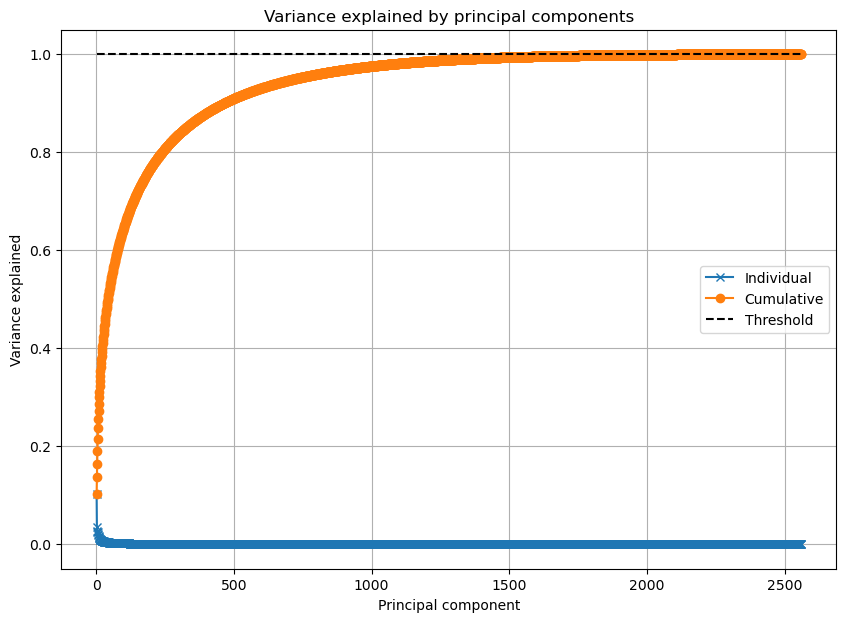

In [38]:

# PCA by computing SVD of Y

U,S,V = np.linalg.svd(scaled_data_unlebeled2,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 1

# Plot variance explained
plt.figure(figsize=(10,7))

plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


In [39]:
pca = PCA()
pca.fit(scaled_data_unlebeled2)

PCA()

In [40]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


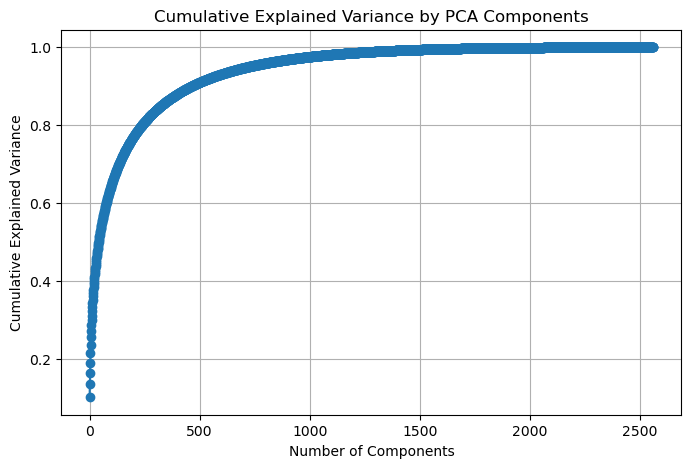

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


In [42]:
# Number of components explaining at least 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 because Python uses zero-based indexing

# Number of components explaining at least 60% variance
n_components_60 = np.argmax(cumulative_variance >= 0.60) + 1  # Add 1 for the same reason

# Number of components explaining at least 60% variance
n_components_40 = np.argmax(cumulative_variance >= 0.40) + 1  # Add 1 for the same reason


In [43]:
print(f"Number of components explaining at least 40% variance: {n_components_40}")

print(f"Number of components explaining at least 60% variance: {n_components_60}")

print(f"Number of components explaining at least 80% variance: {n_components_80}")


Number of components explaining at least 40% variance: 22
Number of components explaining at least 60% variance: 77
Number of components explaining at least 80% variance: 239


## Check the combine dataset

In [44]:
#All dataset stractural
dataset3_unlabeled_stractural = pd.read_csv('data/unlabeled.csv')

##drop PDB, Long SS, Sequence and target feature SDS Stable

dataset3_unlabeled_stractural= dataset3_unlabeled_stractural.drop(['PDB', 'Long SS', 'Sequence', 'SDS Stable'], axis=1)

# Concatenate the DataFrames
dataset3_unlabeled = pd.concat([dataset3_unlabeled_stractural, dataset2_unlabeled], axis = 1,ignore_index=True)
dataset3_unlabeled.head()

,0,1,2,3,4,5,6,7,8,9,...,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577
0,760,59,1,-13,29082.982422,83,79,7253.579102,96,87,...,0.104507,-0.209106,0.026390,-0.034675,0.164679,-0.046357,-0.086354,0.092409,-0.050137,-0.178787
1,259,17,0,-8,11591.454102,20,19,1613.963379,28,28,...,0.057338,-0.095117,0.106728,-0.085964,0.067033,0.001800,0.046425,0.032737,-0.098372,-0.114315
2,419,32,0,-15,13865.898438,38,36,2739.008789,53,42,...,0.055709,-0.095342,0.042804,-0.025231,0.053732,-0.037928,0.064099,0.038445,-0.057057,-0.022486
3,230,28,1,2,8888.607422,19,18,1438.582153,17,16,...,0.115832,-0.082564,0.045533,-0.065703,0.012751,-0.011484,0.043135,0.027399,-0.050511,-0.100954
4,137,6,0,2,8025.223633,23,23,2504.927734,21,20,...,0.063100,-0.113716,0.046959,-0.027659,0.130872,-0.057488,0.032790,0.111607,-0.140744,-0.089814


In [45]:


scaler = StandardScaler()
scaled_data_unlebeled3 = scaler.fit_transform(dataset3_unlabeled)

In [46]:
pca = PCA()
pca.fit(scaled_data_unlebeled3)

PCA()

In [47]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


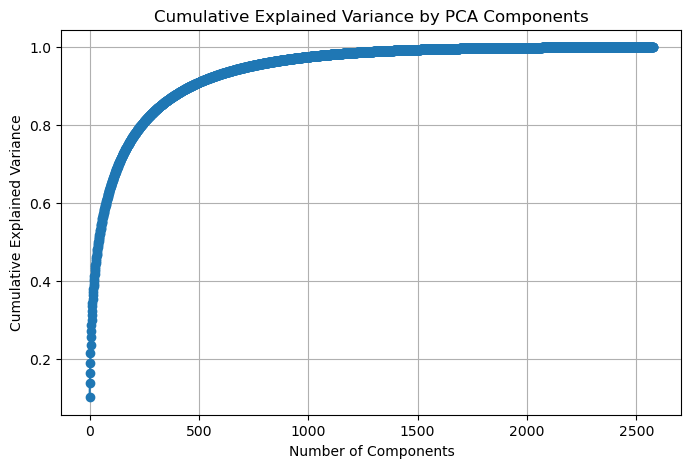

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


In [49]:
# Number of components explaining at least 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 because Python uses zero-based indexing

# Number of components explaining at least 60% variance
n_components_60 = np.argmax(cumulative_variance >= 0.60) + 1  # Add 1 for the same reason

# Number of components explaining at least 60% variance
n_components_40 = np.argmax(cumulative_variance >= 0.40) + 1  # Add 1 for the same reason


In [50]:
print(f"Number of components explaining at least 40% variance: {n_components_40}")

print(f"Number of components explaining at least 60% variance: {n_components_60}")

print(f"Number of components explaining at least 80% variance: {n_components_80}")


Number of components explaining at least 40% variance: 22
Number of components explaining at least 60% variance: 76
Number of components explaining at least 80% variance: 238
